In [1]:
import json
import pickle

import numpy as np
import pandas as pd
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from tqdm import tqdm

# import dataholders as dh
import tools.utils as utils
import tools.points_processing as pp

In [2]:
with open('data/data16.pickle', 'rb') as f:
    data = pickle.load(f)

In [3]:
time, lowT, upT = data['time_av'], data['lowT_av'], data['upT_av']

In [4]:
time, low_labels, up_labels, lowT, upT = pp.prepare_data()

In [5]:
pos_time_data, pos_temp_data = pp.generate_positive(low_labels, time, lowT, size=20)

print(pos_time_data.shape)

100%|██████████| 791858/791858 [00:04<00:00, 171060.89it/s]

(2930, 20)


In [26]:
start = 80000
end   = 750000
neg_time_data, neg_temp_data = pp.generate_negative(low_labels[start:end], time[start:end], lowT[start:end], size=20, safe=50)

print(neg_temp_data.shape)

100%|██████████| 670000/670000 [00:03<00:00, 169058.14it/s]

(12979, 20)


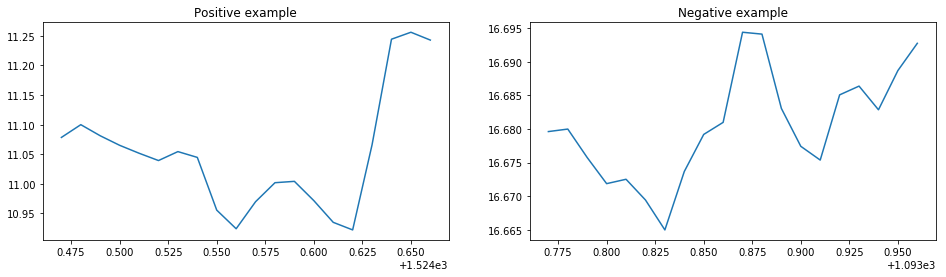

In [31]:
plt.rcParams['figure.figsize'] = [16, 4]

idx = 491

plt.subplot(121)
plt.plot(pos_time_data[idx]/1000., pos_temp_data[idx])
plt.title("Positive example")

idx = 485

plt.subplot(122)
plt.plot(neg_time_data[idx]/1000., neg_temp_data[idx])
plt.title("Negative example")
plt.show()